In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('homeprices (2).csv')
df

,area,bedrooms,age,price,predicted
0,2600,3.0,20,550000,550000.000000
1,3000,4.0,15,565000,632166.666667
2,3200,4.0,18,610000,638833.333333
3,3600,3.0,30,595000,595000.000000
4,4000,5.0,8,760000,760000.000000
5,4100,6.0,8,810000,810000.000000


In [3]:
df.bedrooms.median()

4.0

In [4]:
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [5]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price,predicted
0,2600,3.0,20,550000,550000.000000
1,3000,4.0,15,565000,632166.666667
2,3200,4.0,18,610000,638833.333333
3,3600,3.0,30,595000,595000.000000
4,4000,5.0,8,760000,760000.000000
5,4100,6.0,8,810000,810000.000000


In [6]:
df

,area,bedrooms,age,price,predicted
0,2600,3.0,20,550000,550000.000000
1,3000,4.0,15,565000,632166.666667
2,3200,4.0,18,610000,638833.333333
3,3600,3.0,30,595000,595000.000000
4,4000,5.0,8,760000,760000.000000
5,4100,6.0,8,810000,810000.000000


In [7]:
x = df.area + df.bedrooms + df.age
y = df.price

Text(0.5, 1.0, 'homeprices (2)')

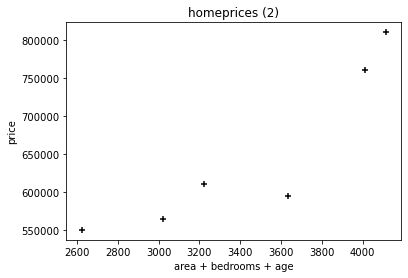

In [8]:
plt.scatter(x, y, marker='+', color='black')
plt.xlabel('area + bedrooms + age')
plt.ylabel('price')
plt.title('homeprices (2)')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df[['area', 'bedrooms', 'age']]
y = df['price']

In [11]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [12]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [13]:
(xtrain, xtest, ytrain, ytest) = train_test_split(x, y, test_size=0.25, random_state=1)

In [14]:
xtrain, ytrain

(   area  bedrooms  age
 4  4000       5.0    8
 0  2600       3.0   20
 3  3600       3.0   30
 5  4100       6.0    8,
 4    760000
 0    550000
 3    595000
 5    810000
 Name: price, dtype: int64)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [18]:
reg.predict(df[['area', 'bedrooms', 'age']])

array([550000.        , 632166.66666667, 638833.33333333, 595000.        ,
       760000.        , 810000.        ])

In [19]:
reg.predict([[3500, 5, 20]])

array([697833.33333333])

In [20]:
df['predicted'] = reg.predict(df[['area', 'bedrooms', 'age']])
df

,area,bedrooms,age,price,predicted
0,2600,3.0,20,550000,550000.000000
1,3000,4.0,15,565000,632166.666667
2,3200,4.0,18,610000,638833.333333
3,3600,3.0,30,595000,595000.000000
4,4000,5.0,8,760000,760000.000000
5,4100,6.0,8,810000,810000.000000


In [21]:
df.to_csv('homeprices (2).csv', index=False)

In [22]:
reg.coef_

array([   68.33333333, 43166.66666667, -2333.33333333])

In [23]:
reg.intercept_

289500.0000000002

In [40]:
import joblib as jl

In [41]:
jl.dump(reg, 'lrm')

['lrm']

In [42]:
m = jl.load('lrm')

In [43]:
m.coef_

array([   68.33333333, 43166.66666667, -2333.33333333])